In [5]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

## Load Dataset

In [9]:
df = pd.read_csv("../data/raw_analyst_ratings.csv", parse_dates=['date'])
df['date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')
if df['date'].dt.tz is None:
    df['date'] = df['date'].dt.tz_localize('Etc/GMT+4')

print('rows: ', len(df))
df.head()

rows:  1407328


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


## EDA

**Descriptive Statistics**

In [10]:
# Statistics on headline lengths
df["headline_len"] = df["headline"].str.len()
print(df["headline_len"].describe())

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_len, dtype: float64


In [15]:
# article per publisher
pub_counts = df["publisher"].value_counts().reset_index()
pub_counts
pub_counts.columns = ["publisher", "article_count"]
print(pub_counts.head(15))

            publisher  article_count
0       Paul Quintaro         228373
1          Lisa Levin         186979
2   Benzinga Newsdesk         150484
3       Charles Gross          96732
4       Monica Gerson          82380
5        Eddie Staley          57254
6          Hal Lindon          49047
7       ETF Professor          28489
8          Juan Lopez          28438
9      Benzinga Staff          28114
10         Vick Meyer          24826
11          webmaster          20313
12  Benzinga_Newsdesk          19410
13              Zacks          19390
14     Jayson Derrick          19050


<Axes: title={'center': 'Articles per Day'}, xlabel='date'>

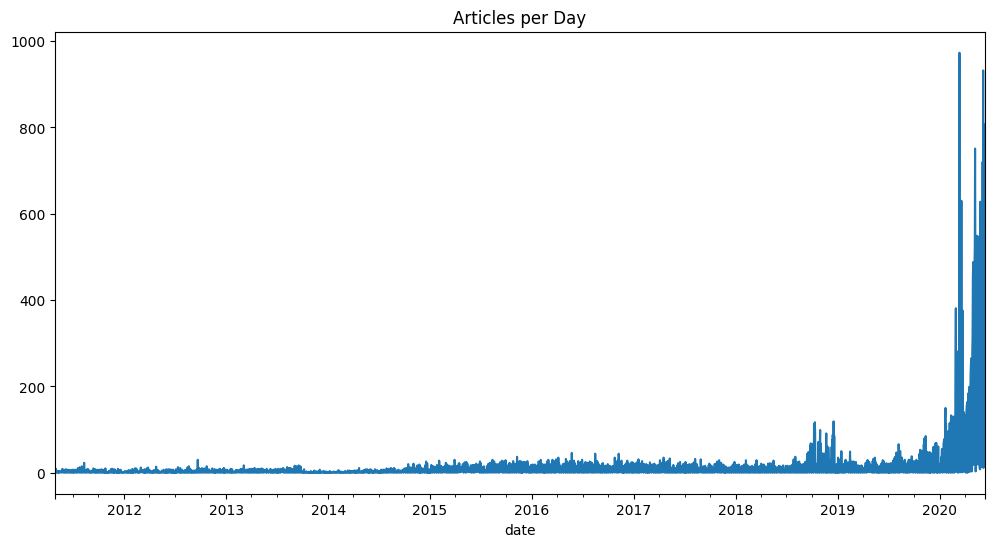

In [16]:
# publications over time (daily)
daily = df.set_index('date').resample('D').size()
daily.plot(title='Articles per Day', figsize=(12,6))

**Text Analysis**